In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


# Data Analysis and Preprocessing

In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [4]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [5]:
# remove null values by filling its mean => easy as column datatype is float
df["reading score"] = df["reading score"].fillna(df["reading score"].mean())
df["writing score"] = df["writing score"].fillna(df["writing score"].mean()) 

In [6]:
# column ["math score"] has (object) datatype => remove string values from it and keep the integer no. 
df["math score"] = df["math score"].str.extract("(\d+)",expand=False)
# now convverting it to float datatype
df["math score"] = df["math score"].astype("object").astype("float64")
# now remove the null values by fillna(mean)
df["math score"] = df["math score"].fillna(df["math score"].mean()) 

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [9]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

# 1. Scan all numeric variables for outliers. If there are outliers, use the following techniques to deal with them. 
- a) min max normalization 
- b) z-score normalization 
- c) Box plot

## finding and handling Outliers

### 1.the outliers are the extreme values within the dataset. 
### 2.they can be the result of issues like human error, faulty equipment, or poor sampling
### 3.Regardless of how they get into the data, outliers can have a big impact on statistical analysis 
### and machine learning because they impact calculations like mean and standard deviation

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.509927,68.008048,69.487386
std,17.207884,16.552339,29.430286
min,0.000000,3.000000,10.000000
25%,57.000000,58.000000,58.000000
50%,66.509927,69.000000,69.000000
75%,76.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


# 1. Minmax Normalization

In [11]:
# using user defined function 
def minmax(col):
    return (col-col.min())/(col.max()-col.min())

df["math score"] = minmax(df["math score"])
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,0.199132,68.008048,69.487386
std,0.051521,16.552339,29.430286
min,0.000000,3.000000,10.000000
25%,0.170659,58.000000,58.000000
50%,0.199132,69.000000,69.000000
75%,0.227545,79.000000,79.000000
max,1.000000,100.000000,567.000000


In [12]:
# using predefined function
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["math score"]] = scaler.fit_transform(df[["math score"]])
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,0.199132,68.008048,69.487386
std,0.051521,16.552339,29.430286
min,0.000000,3.000000,10.000000
25%,0.170659,58.000000,58.000000
50%,0.199132,69.000000,69.000000
75%,0.227545,79.000000,79.000000
max,1.000000,100.000000,567.000000


# 2. Z-score normalization

### 1.find extreme limit 2.Finding the outliers 3.remove outliers

In [13]:
df["reading score"].skew()

-0.8169514901112902

In [14]:
#1.finding the extreme limits
upper_limit = df["reading score"].mean() + 3 * df["reading score"].std()
lower_limit = df["reading score"].mean() - 3 * df["reading score"].std()
print("Upper limit: ",upper_limit)
print("Lower limit: ",lower_limit)

Upper limit:  117.66506430724493
Lower limit:  18.35103227223192


In [15]:
#2.printing the outliers beyond these given extreme limit :# displaying the outliers from "reading score" 
new_df = df[ (df["reading score"]<lower_limit) | (df["reading score"]>upper_limit) ]
print("No. of Outliers are: \n")
new_df["reading score"].count()
# new_df

No. of Outliers are: 



17

In [16]:
#3.after removing all the outliers : Trimming of outliers
result_df = df[ (df["reading score"]>lower_limit) & (df["reading score"]<upper_limit) ]
print("No. of records without Outliers : \n")
result_df["reading score"].count()
# result_df

No. of records without Outliers : 



983

In [17]:
result_df["reading score"].skew()

-0.2856081583770433

# 3. Box Plot (IQR range method)

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,0.199132,68.008048,69.487386
std,0.051521,16.552339,29.430286
min,0.000000,3.000000,10.000000
25%,0.170659,58.000000,58.000000
50%,0.199132,69.000000,69.000000
75%,0.227545,79.000000,79.000000
max,1.000000,100.000000,567.000000


In [19]:
df["writing score"].skew()

11.501999723973539

<Axes: >

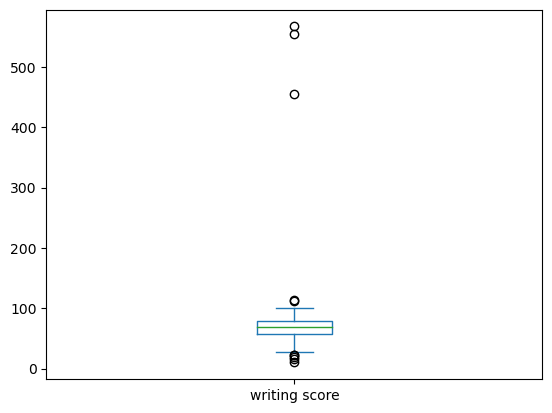

In [20]:
df["writing score"].plot(kind="box")

In [21]:
# 1.finding the values of Q1,Q3,IQR
Q1 = df["writing score"].quantile(0.25)
Q3 = df["writing score"].quantile(0.75)
IQR = Q3 - Q1
print("Q1:",Q1,"\nQ3:",Q3,"\nIQR:",IQR)

Q1: 58.0 
Q3: 79.0 
IQR: 21.0


In [22]:
# 2.finding the min and max limit
max_limit = IQR + 1.5 * Q3
min_limit = IQR - 1.5 * Q1
print("max_limit:",max_limit,"\nmin_limit:",min_limit)

max_limit: 139.5 
min_limit: -66.0


In [23]:
# 3.displaying the outliers from "writing score"
new_df2 = df[ (df["writing score"]<min_limit) | (df["writing score"]>max_limit) ]
print("Outliers are: \n")
new_df2

Outliers are: 



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
542,female,group C,associate's degree,standard,none,0.242515,77.0,455.0
591,male,group A,some high school,standard,none,0.212575,62.0,567.0
651,female,group A,high school,standard,completed,0.203593,80.0,554.0


In [24]:
# 4.after removing all the outliers : Trimming of outliers
result_df2 = df[ (df["writing score"]>min_limit) & (df["writing score"]<max_limit) ]
# result_df2.loc[540:550]
result_df2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.215569,72.0,74.0
1,female,group C,some college,standard,completed,0.206587,90.0,88.0
2,female,group B,master's degree,standard,none,0.269461,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,0.140719,57.0,44.0
4,male,group C,some college,standard,none,0.227545,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.263473,99.0,95.0
996,male,group C,high school,free/reduced,none,0.185629,55.0,55.0
997,female,group C,high school,free/reduced,completed,0.176647,71.0,65.0
998,female,group D,some college,standard,completed,0.203593,78.0,77.0


In [25]:
result_df2["writing score"].skew()

-0.25488040502866033

<Axes: >

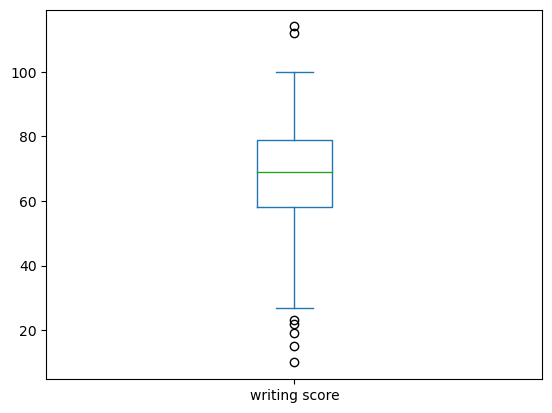

In [26]:
result_df2["writing score"].plot(kind="box")